In [1]:
%load_ext autoreload
%autoreload 2

- [Element Picker](#Element-Picker)
- [Gaussian Smoothing Picker](#Gaussian-Smoothing-Picker)
- [Von Mises](#Von-Mises-Stress-Condition)
- [Von Mises Result](#Von-Mises-Result)
- [Circle](#Circle-Stress-Condition)
- [Circle Result](#Circle-Result)

In [2]:
import struct_opt.material_opt as material_opt
import struct_opt.visual as visual
from struct_opt.environment_setup import get_element_index_matrix

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


Element Picker
---

elements are indexed in the following manner

| 1 | 5 | 9  | 13 |
|---|---|----|----|
| 2 | 6 | 10 | 14 |
| 3 | 7 | 11 | 15 |
| 4 | 8 | 12 | 16 |

visualize elements using function below

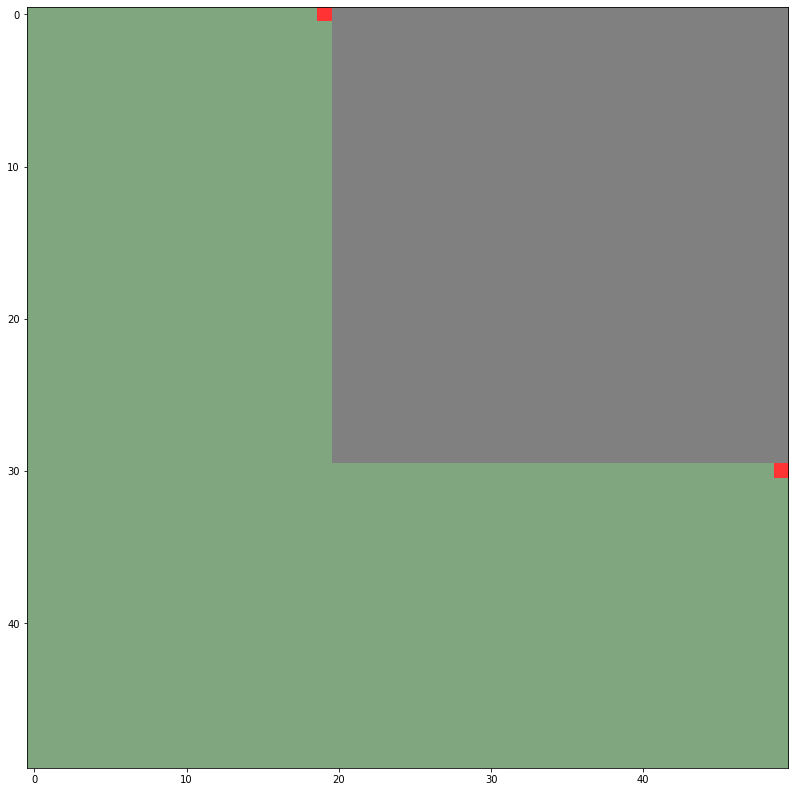

In [7]:
problem_size = 10

elements = [16 * np.square(problem_size) - problem_size * 2, 950]
element_index_matrix = get_element_index_matrix(problem_size)


visual.highlight_elements(element_index_matrix, elements)

Gaussian Smoothing Picker
---

Use this to check how the mass is spread out for different value of the variance and width of some element

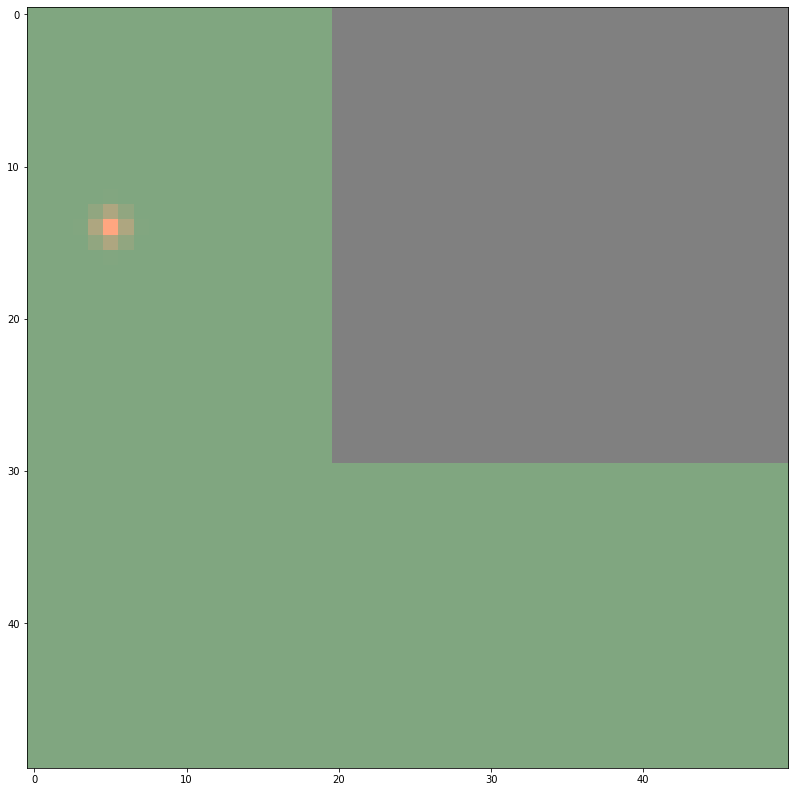

In [8]:
visual.highlight_gaussian_smoothing(element_index_matrix, element=264, variance=1.0, width=3.0)

Von Mises Stress Condition
---

In [31]:
problem_size = 20
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2
    ]),
    directions=np.array([
        1
    ]),
    amplitudes=np.array([
        -1
    ]),
    max_constraint=1,
    
    mode="von mises",
    
    smoothing_mode="gaussian", #gaussian or none
    smoothing_width=3.0,
    variance=0.5,
    
    penalty_mode="entropy", # entropy or none
    penalty_epochs=40, # Last x epochs uses penalty
    penalty_size=2.0,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=200,
    barrier_width=1800,
    
    epochs=100,
    learning_rate=0.15,
    
    data_directory="data"
)


Initializing env: 0.05424642562866211 seconds
0: O: 1702.9030592077397 W: 2029.3564676610406 C 3476.908291240782 -- T: 2.321474552154541
1: O: 1655.0526151631952 W: 1993.5346061534249 C 3413.488568001223 -- T: 2.1603012084960938
2: O: 1604.8735286777649 W: 1953.1534602570694 C 3358.935332468901 -- T: 2.128986120223999
3: O: 1551.578344088664 W: 1907.9094024286976 C 3312.0639621872388 -- T: 2.1505846977233887
4: O: 1501.6098989443874 W: 1857.5846162919624 C 3314.1786293048353 -- T: 2.1507201194763184
5: O: 1444.9382848124665 W: 1802.863917328288 C 3302.554844433165 -- T: 2.1288657188415527
6: O: 1380.7063565126336 W: 1743.2223879003184 C 3274.7532595322923 -- T: 2.153611898422241
7: O: 1311.8861826633492 W: 1678.5807446202791 C 3248.889597345223 -- T: 2.1290228366851807
8: O: 1242.0679145484548 W: 1608.8319245065834 C 3248.450808241576 -- T: 2.156121253967285
9: O: 1167.475425960366 W: 1534.330837684044 C 3247.8787084951373 -- T: 2.1307098865509033
10: O: 1095.9990160040657 W: 1455.6091

90: O: 2554.754993483533 W: 940.4205376890525 C 3376.509286236416 -- T: 2.1338489055633545
91: O: 2528.3439292954886 W: 935.1736814431916 C 3381.823230500565 -- T: 2.132086992263794
92: O: 2505.5689890490457 W: 930.1019552303799 C 3405.953291587812 -- T: 2.131984233856201
93: O: 2481.9476418397217 W: 925.4411866968298 C 3417.601654638313 -- T: 2.152513027191162
94: O: 2458.1448819484103 W: 920.9794245475761 C 3427.3731361328087 -- T: 2.1550447940826416
95: O: 2479.688298652902 W: 916.5276777620791 C 3652.8396772613855 -- T: 2.133230209350586
96: O: 2415.225711614457 W: 912.8122380532875 C 3452.030575014685 -- T: 2.130404472351074
97: O: 2391.0610025740766 W: 909.0811948533362 C 3442.0195110436202 -- T: 2.131756544113159
98: O: 2393.558535047727 W: 905.3216635242129 C 3566.726222244825 -- T: 2.130218982696533
99: O: 2395.7478108533214 W: 901.7968175145577 C 3671.918008818019 -- T: 2.1326441764831543
Time to run optimization 100 epochs: 214.15820479393005 seconds


Von Mises Result
---

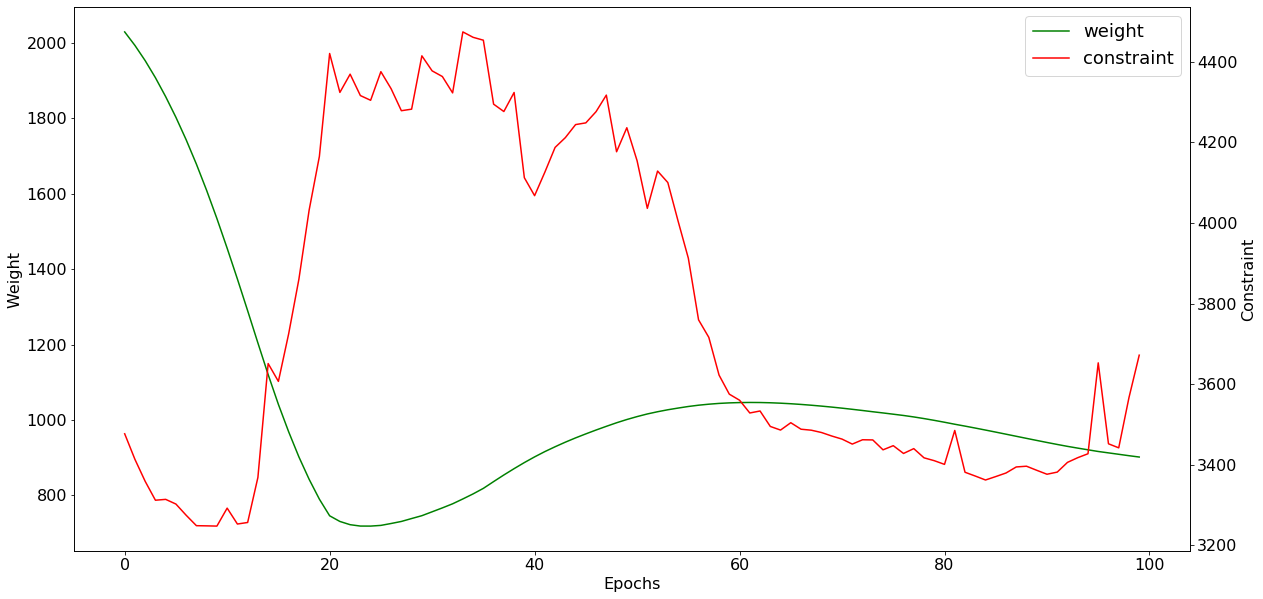

In [32]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

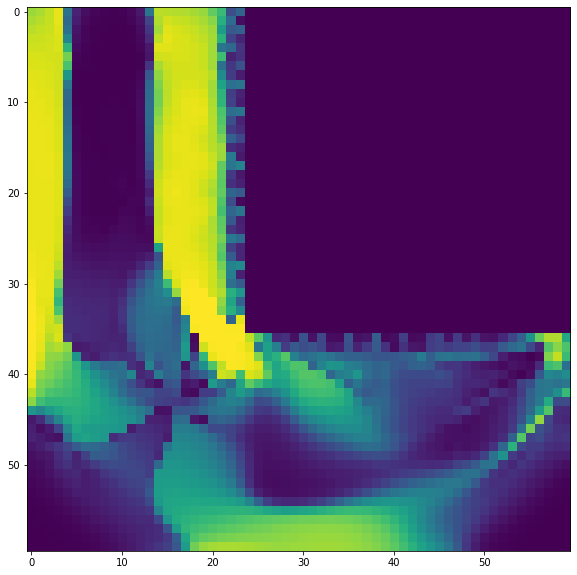

In [33]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())

Circle Stress Condition
---

In [26]:
problem_size = 10
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2, 225
    ]),
    directions=np.array([
        1,
        1
    ]),
    amplitudes=np.array([
        -1,
        -1
    ]),
    max_constraint=18000,
    
    mode="circle",
    
    smoothing_mode="gaussian",
    smoothing_width=3.0,
    variance=1.0,
    
    penalty_mode="entropy", # entropy or none
    penalty_epochs=50, # Last x epochs uses penalty
    penalty_size=2.0,
    
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=100,
    barrier_width=2000,
    
    epochs=100,
    learning_rate=0.15,
    
    phis=[0.0, 0.5],
    kf=0.3,
    
    data_directory="data"
)


Initializing env: 0.04940056800842285 seconds
0: O: 1125.3024583356428 W: 1409.275324764612 C 16288.887795125303 -- T: 1.080822467803955
1: O: 1104.4987898421589 W: 1391.7501287774414 C 16231.859735206917 -- T: 0.827491044998169
2: O: 1082.8822013938236 W: 1370.4404586462954 C 16226.424652494958 -- T: 0.8342361450195312
3: O: 1060.2490952942835 W: 1345.7981299929954 C 16261.704120030836 -- T: 0.8313825130462646
4: O: 1036.6197668910777 W: 1317.999008035264 C 16332.697054105814 -- T: 0.8309230804443359
5: O: 1012.1724246788563 W: 1287.565982275509 C 16429.568404816557 -- T: 0.8256580829620361
6: O: 987.1556210176885 W: 1255.1481307286454 C 16541.59991288509 -- T: 0.8316648006439209
7: O: 961.9703502344216 W: 1220.9287310794693 C 16667.57749808018 -- T: 0.8296477794647217
8: O: 937.166725866344 W: 1185.420095291779 C 16802.8441707604 -- T: 0.8287866115570068
9: O: 913.3207742502027 W: 1149.5726292150257 C 16938.234109260295 -- T: 0.8328216075897217
10: O: 890.7413674278009 W: 1114.784694

90: O: 768.6339186580385 W: 827.5908111632963 C 16661.3722751259 -- T: 0.8412261009216309
91: O: 765.2539824922414 W: 828.0661807930027 C 16642.540048591414 -- T: 0.8542664051055908
92: O: 762.5928931049441 W: 828.521685250639 C 16633.422637944135 -- T: 0.8406777381896973
93: O: 760.8056992945673 W: 828.969073313383 C 16635.554555808976 -- T: 0.8662104606628418
94: O: 758.541596815458 W: 829.4689398938862 C 16625.288345590438 -- T: 0.8436286449432373
95: O: 755.757831839237 W: 829.9694231485366 C 16606.6027516883 -- T: 0.8480532169342041
96: O: 752.7677296742891 W: 830.451557271638 C 16584.01328566778 -- T: 0.8449995517730713
97: O: 753.5556223392408 W: 831.053654641162 C 16605.130189534586 -- T: 0.8689436912536621
98: O: 750.6363459873072 W: 831.8087861669785 C 16562.42887842216 -- T: 0.8680419921875
99: O: 749.9612028537364 W: 832.3627409061992 C 16561.44832353929 -- T: 0.8422091007232666
Time to run optimization 100 epochs: 84.94916582107544 seconds


Circle Result
---

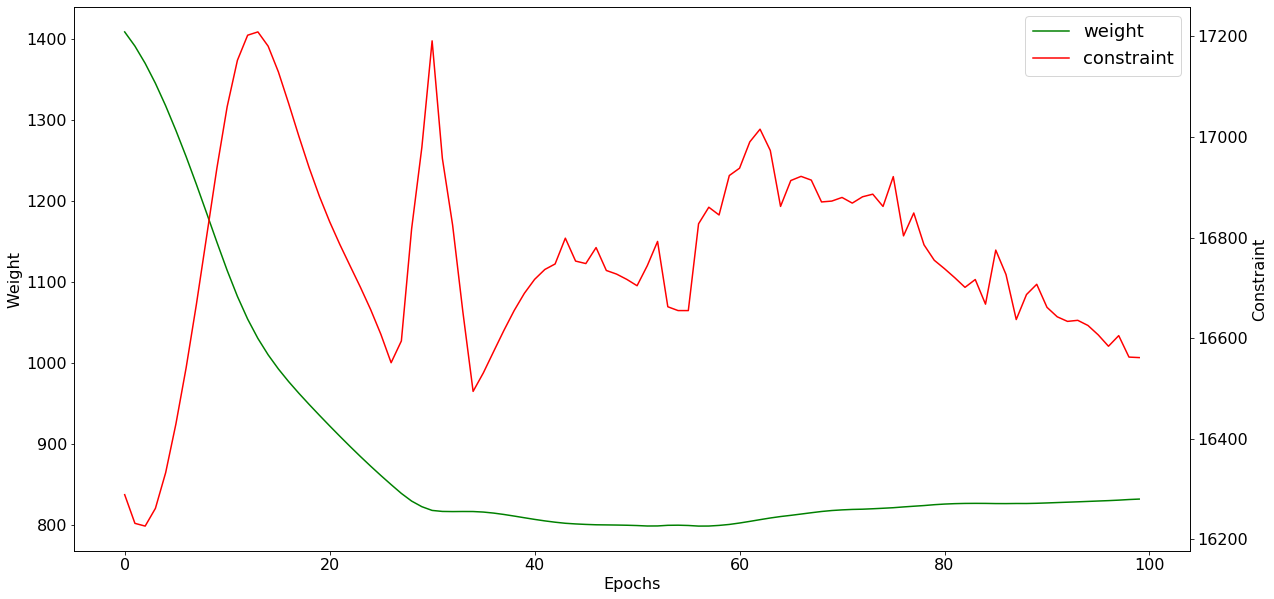

In [27]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

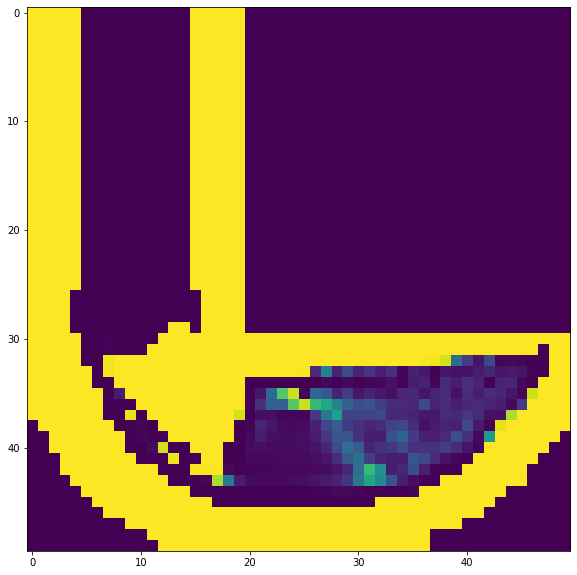

In [28]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())